## Part 1: Regression Examples

We need to import our libraries, including the linear regression models.  We will also need train_test_split to divide data set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Let's do some examples of regression examples

In [2]:
X = np.array([[1], [4], [0], [3]])
y = np.array([[5.7], [10], [2.6], [9.3]])


Build a regression model

In [3]:
reg =LinearRegression().fit(X,y)

Show the R-2 goodness of fit. Recall R-2 (r-square) is the ratio of the variance that is explainable with our model divided by the total variance.  R-2 should approach 1.0 for a good model.

In [4]:
reg.score(X, y)


0.9590934844192635

Show the weights -- X weight and the Intercept

In [5]:
reg.coef_

array([[1.84]])

In [6]:
reg.intercept_

array([3.22])

**Open a text cell after this one and give the equation for the regression for this example**

Regresion equation: y = mX + b
Equation for this dataset: y = 1.84X + 3.22

Predict on new observations. We use a different set of observations (test set) to evaluate our models.

In [7]:
Xtst = np.array([[2], [5]])
ytst = np.array([[7], [13.1]])

In [8]:
# Make predictions using the testing set
y_pred = reg.predict(Xtst)

In [9]:
y_pred

array([[ 6.9 ],
       [12.42]])

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

Show the mean-squared-error (MSE) and R-2 for the new observation predictions. Note that the R-2 here (which is measured on the new observations -- known as the the test set) will most likely differ from the R-2 above (which was measured on the data that we used to generate the regression model -- also know as the training set)

In [11]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytst, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytst, y_pred))

Mean squared error: 0.24
Coefficient of determination: 0.97


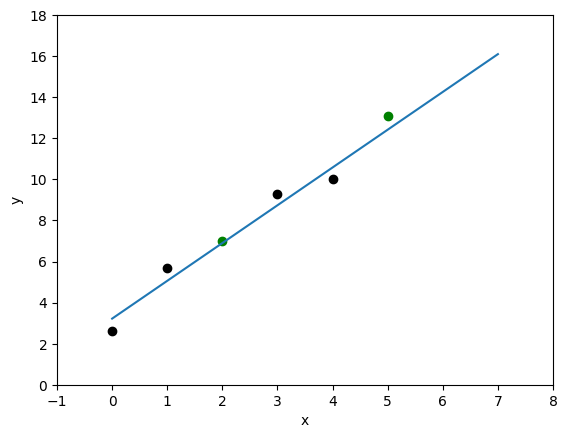

In [12]:
# Plot outputs
plt.scatter(Xtst, ytst, color="green", label="Test")
plt.scatter(X, y, color="black", label="Train")

X_test = np.linspace(0, 7, 70)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 8))
plt.ylim((0, 18))


plt.show()

The fit for this dataset is quite good.  Now let's look at a less linear dataset:

In [13]:
X = np.array([[1], [4], [0], [3]])
y = np.array([[4.7], [17.9], [2.6], [12.3]])

**Insert cells to call LinearRegression(), generate the R-2, and print out the coefficient and the intercept, as we did above.**

In [15]:
reg =LinearRegression().fit(X,y)
print(f"R-2: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

R-2: 0.9794378723047236
Coefficient: [[3.82]]
Intercept: [1.735]


Now predict our Y values for new observations:

In [16]:
Xtst = np.array([[2], [7]])
ytst = np.array([[6.9], [53.1]])

.predict() gives predicted value for new observation

In [17]:
y_pred = reg.predict(Xtst)

In [18]:
y_pred

array([[ 9.375],
       [28.475]])

Now compute the mean squared error and R-2 of the test data

In [19]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytst, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytst, y_pred))

Mean squared error: 306.26
Coefficient of determination: 0.43


Such a low R-2 should be reason for concern about the model we are using. Let's visualize our results

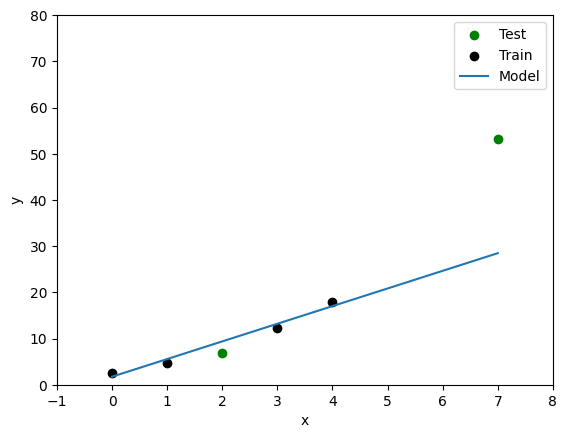

In [20]:
# Plot outputs
plt.scatter(Xtst, ytst, color="green", label="Test")
plt.scatter(X, y, color="black", label="Train")

X_test = np.linspace(0, 7, 70)
plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 8))
plt.ylim((0, 80))
plt.legend(loc="best")

plt.show()

So, this is obviously not a good fit for the dataset we have used.  Such a small training dataset exposes an issue.  Three points does not give us enough information to derive the true characteristics of the function we are approximating.  With the additional observations, it's apparent that this is not a linear function, so....

Let's do a polynomial regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

And now let's visualize the results:

/tmp/ipython-input-3318137613.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


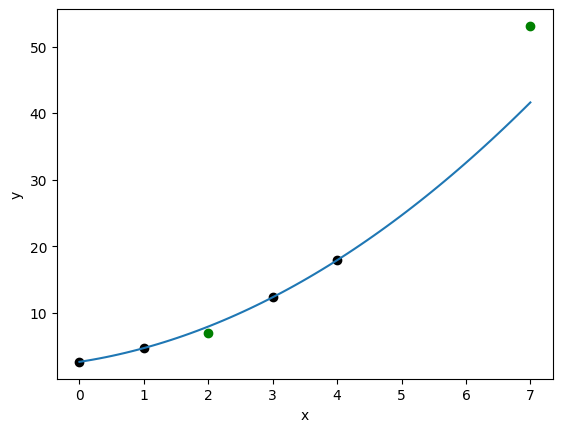

In [22]:

X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(Xtst, ytst, color="green", label="Test")
plt.scatter(X, y, color="black", label="Train")
X_test = np.linspace(0, 7, 70)
plt.plot(X_test, lin_reg2.predict(poly_reg.fit_transform(X_test[:, np.newaxis])), label="Model")




plt.xlabel('x')
plt.ylabel('y')
plt.show()

Again, notice a small training dataset is limiting our accuracy, but ... at least our model follows the non-linear behavior of the data.

Let's do some regression on larger, more compled datasets.  This dataset, vehicle miles-per-gallon, is a commonly used datatset for machine learning.
The following set of cells pull the dataset into a dataframe:

In [23]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [24]:
df = raw_df.copy()
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Look at the dataset to see how many NANs need to be cleaned up!

In [26]:
df.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


With 392 of 398 entries without NaNs, let's just drop the NaN entries.  
**Insert a cell to drop the NaNs**

In [27]:
df = df.dropna()

Let's also ignore the country of origin of the vehicle

In [28]:
df = df.drop('Origin', axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 24.5 KB


In [30]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


We will use a Seaborn pair-plot to examine correlation of features

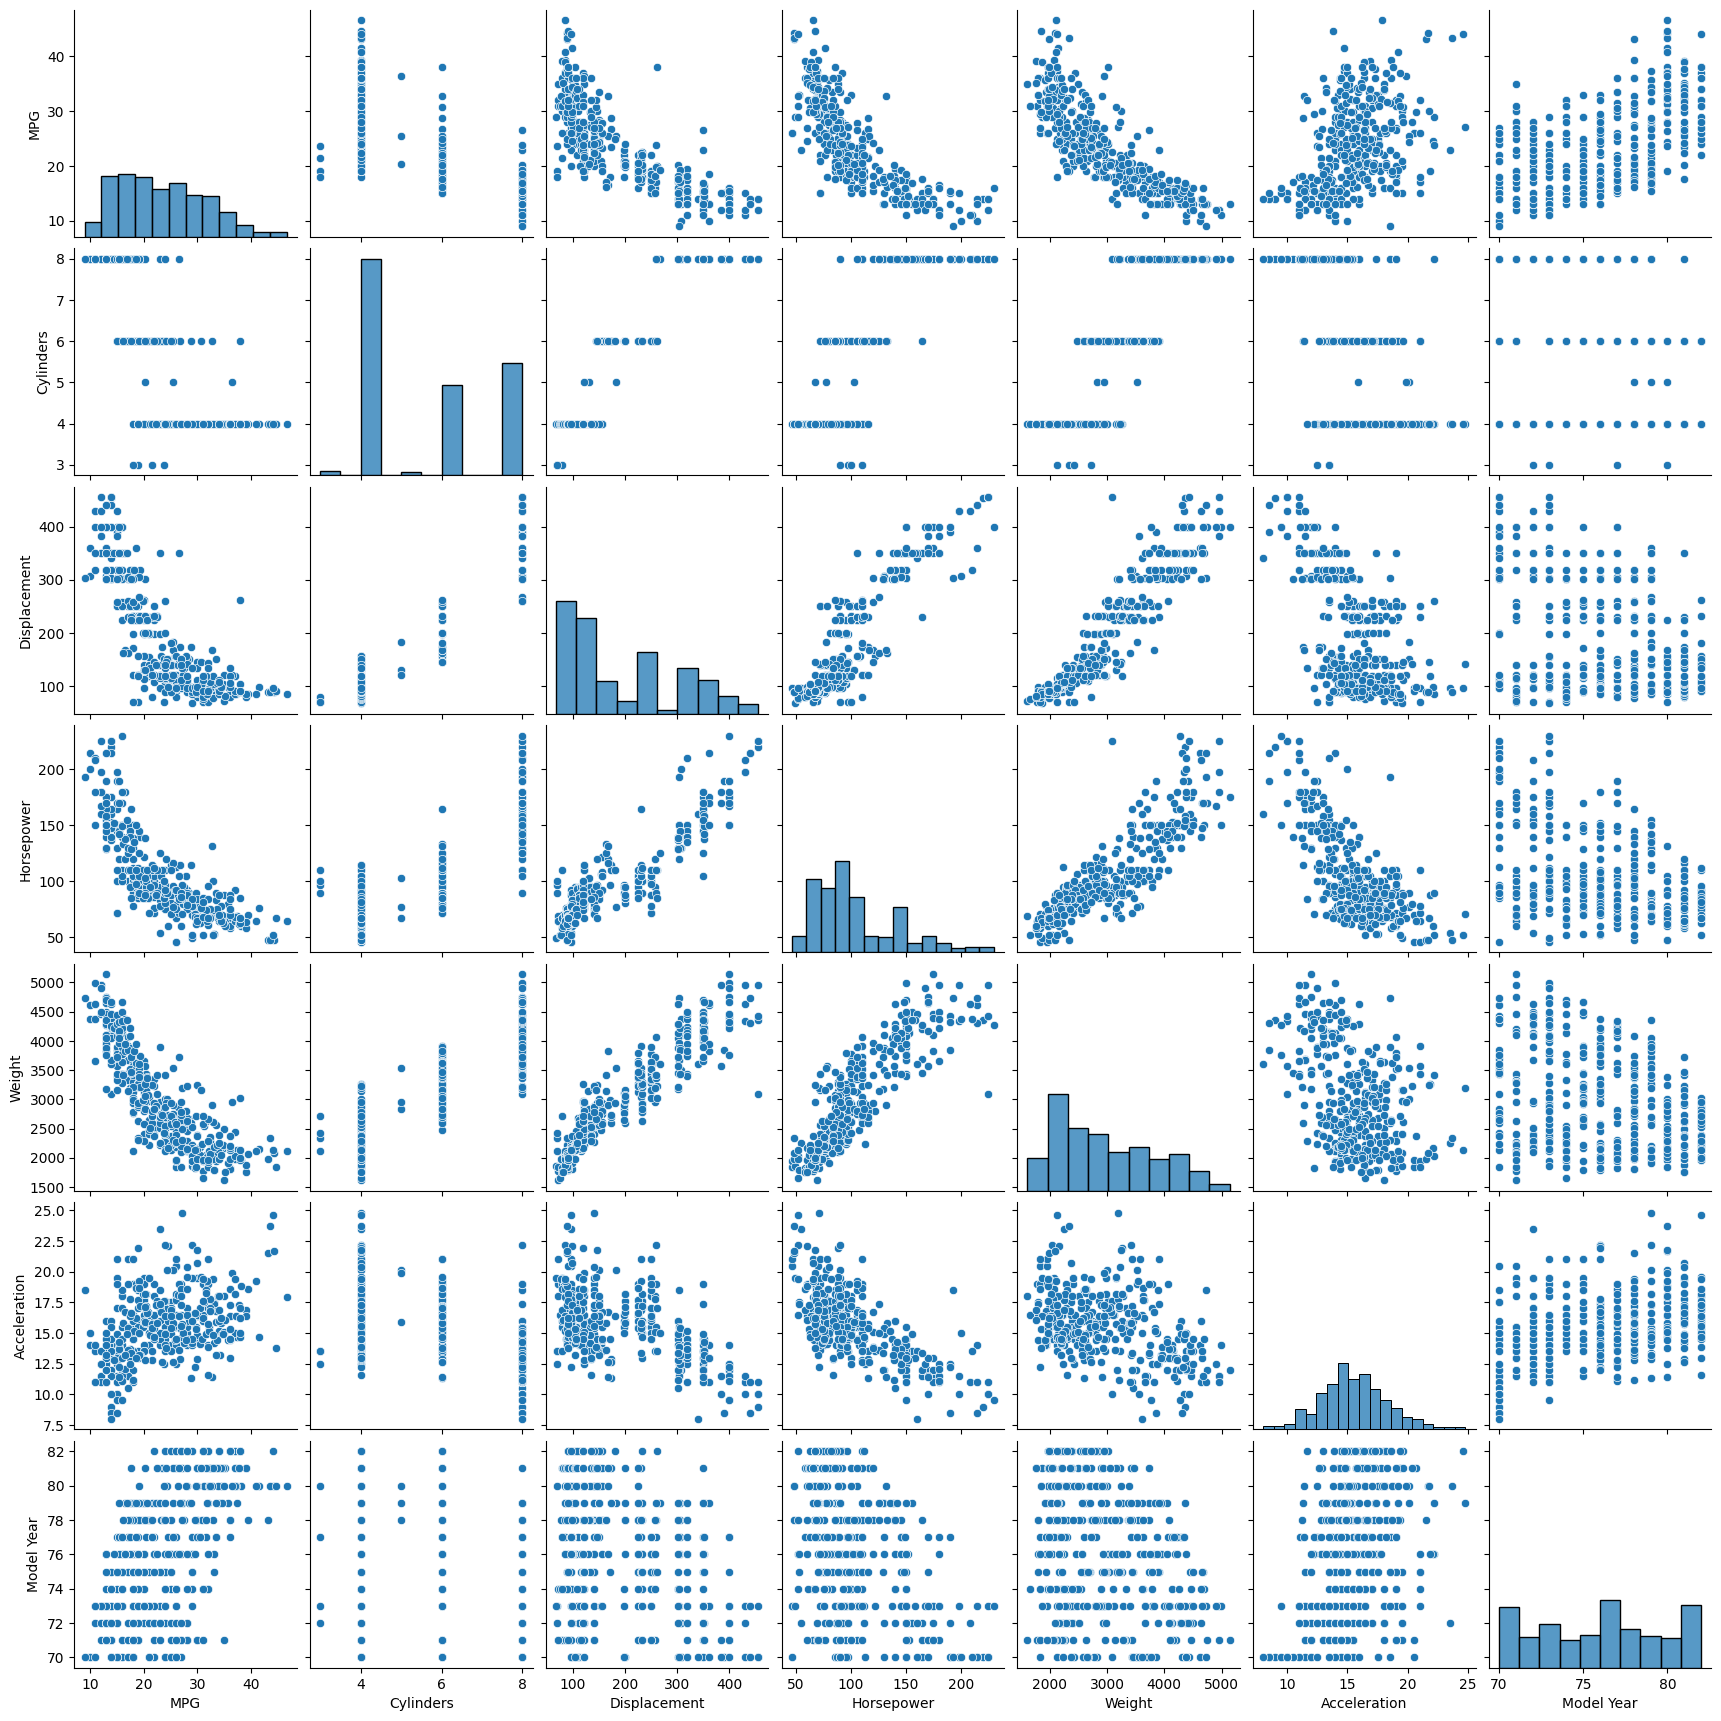

In [31]:
df_plot = df.iloc[:, 0:7]
sns.pairplot(df_plot)


It is also helplful to have the numeric correlation coefficients.  
**Insert a cell with the .corr() method to print them for your dataframe**

In [32]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


Most of the features we are evaluating have significant correlations with the MPG.  To start, let's just use  Displacement and Horsepower to do the regression.
Let's select the subset of the features from our dataframe and pass them to our model building methodology.

In [33]:
# independant variables
X=df[['Displacement', 'Horsepower']]

# the dependent variable
y = df[['MPG']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for Displacement is -0.03879156244055352
The coefficient for Horsepower is -0.06375731497512672


In [35]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [37.31296307]


Sometimes statisticians refer to in_sample and out-of_sample to mean data used to derive the regression (or other model) and the additional data samples used to evaluate the model, repsectively.  In this case it is synonymous with the training set and test set, respectively.

In [36]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.662611560398668
Out-Sample Score = 0.661714395840771


Now include polynomial features up to degree 2

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = linear_model.LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

print(poly_regr.score(X_train2, y_train))


0.7483580788344939


In [38]:
poly_regr.coef_

array([[ 0.00000000e+00, -1.23559814e-01, -1.52792706e-01,
        -6.37731939e-05,  1.05697614e-03, -7.84267246e-04]])

In [39]:
poly_regr.intercept_

array([50.68860463])

The intercept is the w0 or the constant in our fit.  In the coefficient array, the 2nd element is the coefficient for Displacement, 3rd is for HP, 4th is for HPxDisp, 5th is Disp^2, 6th is HP^2.

**Insert a cell with the equation you have found which best predicts vehicle MPG**

MPG=50.6886−0.12356(Displacement)−0.15279(Horsepower)−0.00006377(Displacement×Horsepower)+0.001057(Displacement

**Now repeat the above using all the features 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year' for the independent variables. Copy cells from above and modify to select the features, train/test split, specify the model, train the model, find and print the in and out of sample scores.**


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Independent variables
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]
y = df[['MPG']]

# Train/test split (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Regression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Print coefficients
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

# Intercept
print(f"The intercept for our model is {regression_model.intercept_}")

# In-sample and out-of-sample R^2
print(f"In-Sample R^2: {regression_model.score(X_train, y_train)}")
print(f"Out-of-Sample R^2: {regression_model.score(X_test, y_test)}")

The coefficient for Cylinders is -0.020958318335251126
The coefficient for Displacement is 0.007041804443596765
The coefficient for Horsepower is 0.011610254359575488
The coefficient for Weight is -0.00745998646768824
The coefficient for Acceleration is 0.2514733766360765
The coefficient for Model Year is 0.7511697786096567
The intercept for our model is [-17.87326384]
In-Sample R^2: 0.8050707343068905
Out-of-Sample R^2: 0.8118279486147426


**Then do the polynomial degree 2 fit and print the coefficient array intercept, and R^2 score.**

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression
poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# R^2 score
r2_score = poly_regr.score(X_train_poly, y_train)
print(f'Polynomial Degree 2 R^2 (Train): {r2_score}')

# Coefficients and intercept
print('Coefficient array:', poly_regr.coef_)
print('Intercept:', poly_regr.intercept_)

# Optional: see which coefficient corresponds to which term
print(poly.get_feature_names_out(X_train.columns))


Polynomial Degree 2 R^2 (Train): 0.8911705267436757
Coefficient array: [[-2.89295529e-09  2.82664122e+00 -3.66901177e-01 -1.23905263e-01
   2.53450636e-02 -7.20737940e+00 -1.00879283e+01 -1.04609515e+00
   2.58134619e-02  3.28879239e-02 -6.75438550e-04  3.03684865e-01
  -1.78794471e-02 -2.97134776e-04  5.40577673e-04  1.71882567e-05
  -2.72072804e-03  3.17584987e-03  2.20842867e-04 -1.09774248e-04
   4.27901427e-03 -2.20090690e-04  2.54933029e-06 -4.33468222e-04
  -3.35458915e-04  3.56465564e-02  7.37946352e-02  6.69785181e-02]]
Intercept: [439.36437877]
['1' 'Cylinders' 'Displacement' 'Horsepower' 'Weight' 'Acceleration'
 'Model Year' 'Cylinders^2' 'Cylinders Displacement'
 'Cylinders Horsepower' 'Cylinders Weight' 'Cylinders Acceleration'
 'Cylinders Model Year' 'Displacement^2' 'Displacement Horsepower'
 'Displacement Weight' 'Displacement Acceleration'
 'Displacement Model Year' 'Horsepower^2' 'Horsepower Weight'
 'Horsepower Acceleration' 'Horsepower Model Year' 'Weight^2'
 'Weigh

You can experiment by trying other combinations of two features to replace horsepower and displacement above -- several cells up.  By looking at the seaborn it may be possible to pick two features which come close to the R-2 that we get with all of the features. If you do that copy cells below for this analysis -- no extra credit will be given for this exploration.

## Part 2: Regression Analysis of Blower Data

Now we will look at applying regression models to our blower data.

In [44]:
import numpy as np
import pandas as pd

In [45]:
from matplotlib import pyplot
from pandas import DataFrame

In [46]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
!ls drive/MyDrive/ECEN250_LeafBlowersClean.csv ## please change this to the directory of your CSV file that you downloaded from Lab 4 module in Canvas.

drive/MyDrive/ECEN250_LeafBlowersClean.csv


In [48]:
# importing dataset
df = pd.read_csv('drive/MyDrive/ECEN250_LeafBlowersClean.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         97 non-null     object 
 1   model         97 non-null     object 
 2   retail        97 non-null     object 
 3   volt          97 non-null     float64
 4   no batteries  97 non-null     float64
 5   bat Ahr       97 non-null     float64
 6   bat lb        97 non-null     float64
 7   motor type    97 non-null     float64
 8   sound rating  97 non-null     float64
 9   hi cfm        97 non-null     float64
 10  lo cfm        97 non-null     float64
 11  hi mph        97 non-null     float64
 12  lo mph        97 non-null     float64
 13  weight        97 non-null     float64
 14  price         97 non-null     float64
 15  source        97 non-null     object 
dtypes: float64(12), object(4)
memory usage: 12.3+ KB


**Again we probably want to drop the  source field-- since it has long text just clutters up the dataframe. Insert a cell to accomplish this.**

In [50]:
df = df.drop('source', axis=1)

In [51]:
df.head()

,manuf,model,retail,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price
0,Black+Decker,LSW221,Tractor Supply Co,20.0,1.0,1.5,0.9,1.0,61.0,100.0,100.0,130.0,130.0,3.7,99.99
1,Black+Decker,LSW321,Tractor Supply Co,20.0,1.0,2.0,0.9,1.0,54.0,100.0,100.0,130.0,130.0,3.7,119.99
2,Black+Decker,LSW321,Walmart,20.0,1.0,2.0,0.9,1.0,54.0,100.0,100.0,130.0,130.0,3.7,128.00
3,Black+Decker,LSW40C,Home Depot,40.0,1.0,1.5,1.9,0.5,59.0,90.0,90.0,125.0,125.0,6.0,129.00
4,Black+Decker,LSWV36,Home Depot,40.0,1.0,1.5,1.9,0.5,65.0,90.0,90.0,120.0,120.0,6.9,168.00


**We are about to start our modeling -- Make sure that everything except the manufacturer, model, and retail information are numeric:**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         97 non-null     object 
 1   model         97 non-null     object 
 2   retail        97 non-null     object 
 3   volt          97 non-null     float64
 4   no batteries  97 non-null     float64
 5   bat Ahr       97 non-null     float64
 6   bat lb        97 non-null     float64
 7   motor type    97 non-null     float64
 8   sound rating  97 non-null     float64
 9   hi cfm        97 non-null     float64
 10  lo cfm        97 non-null     float64
 11  hi mph        97 non-null     float64
 12  lo mph        97 non-null     float64
 13  weight        97 non-null     float64
 14  price         97 non-null     float64
dtypes: float64(12), object(3)
memory usage: 11.5+ KB


In [53]:
df

,manuf,model,retail,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price
0,Black+Decker,LSW221,Tractor Supply Co,20.0,1.0,1.5,0.9,1.0,61.0,100.0,100.0,130.0,130.0,3.7,99.99
1,Black+Decker,LSW321,Tractor Supply Co,20.0,1.0,2.0,0.9,1.0,54.0,100.0,100.0,130.0,130.0,3.7,119.99
2,Black+Decker,LSW321,Walmart,20.0,1.0,2.0,0.9,1.0,54.0,100.0,100.0,130.0,130.0,3.7,128.00
3,Black+Decker,LSW40C,Home Depot,40.0,1.0,1.5,1.9,0.5,59.0,90.0,90.0,125.0,125.0,6.0,129.00
4,Black+Decker,LSWV36,Home Depot,40.0,1.0,1.5,1.9,0.5,65.0,90.0,90.0,120.0,120.0,6.9,168.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Worx,WG572,Worx,80.0,4.0,5.0,2.4,0.0,83.0,800.0,800.0,150.0,150.0,23.6,699.00
93,Worx,WG583,Worx,20.0,2.0,4.0,2.8,0.0,70.0,350.0,200.0,185.0,116.0,8.4,279.99
94,Worx,WG583.9,Worx,20.0,0.0,4.0,2.8,0.0,70.0,350.0,200.0,185.0,116.0,8.4,219.00
95,Worx,WG584,Ace Hardware,20.0,2.0,2.5,1.8,0.0,62.0,470.0,300.0,95.0,60.0,7.3,219.99


Let's start at looking at linear regression models for the performance of our blowers.  First let's do a simple regression with voltage as a predictor of hi mph:

In [54]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
# independant variables
X=df[['volt']]

# the dependent variable
y = df[['hi mph']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [56]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for volt is 0.8668976809501338


In [57]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [107.12201306]


Let's check how good our model is.

In [58]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.17522109897162685
Out-Sample Score = 0.12809113599575284


This is not good at all!  Instead of simple regression, let's do multiple regression and include voltage, hi max rpm, low max rpm, and price!

In [59]:
# independant variables
X=df[['volt', 'hi cfm', 'price']]
# the dependent variable
y = df[['hi mph']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [60]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for volt is 0.36257258751208826
The coefficient for hi cfm is 0.07758005971591553
The coefficient for price is 0.005035184864611212


In [61]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [89.54148145]


In [62]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.2735695981090217
Out-Sample Score = 0.37410037830333


For my dataset, R-2s are only 0.3 to 0.4.  Maybe we need a 2nd degree polynomial fit.  
**Insert cells below to do the 2nd degree polynomial fit, predict y values with this model for the testset and print the training and test R2s**

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score

# Generate polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit polynomial regression
poly_regr = linear_model.LinearRegression()
poly_regr.fit(X_train_poly, y_train)

# Predict y values for the test set
y_pred_test = poly_regr.predict(X_test_poly)

# Calculate and print R-squared scores
r2_train = poly_regr.score(X_train_poly, y_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Polynomial Degree 2 R^2 (Train): {r2_train}")
print(f"Polynomial Degree 2 R^2 (Test): {r2_test}")

Polynomial Degree 2 R^2 (Train): 0.4078609409071833
Polynomial Degree 2 R^2 (Test): 0.45942897244956127


For me this is only a bit better fit

NOW: let's look at simple linear regression of price: Start with only the hi mph as a predictor of price

In [65]:
# independant variables
X=df[['hi mph']]

# the dependent variable
y = df[['price']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [66]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for hi mph is 0.9428392623923002


In [67]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [105.58435379]


**Insert a cell with the equation for the linear regression model:**

y = 0.9428X + 105.5844

Let's check how good our model is.

In [68]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.06842676846171203
Out-Sample Score = 0.14251919259292645


 Let's see if using a polynomial model for regression works better:

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = linear_model.LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!

print(poly_regr.score(X_train2, y_train))

0.10886757348680842


Still bad ... try the same for max cfm vs price

In [70]:
# independant variables
X=df[['hi cfm']]

# the dependent variable
y = df[['price']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [71]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for hi cfm is 0.38362633895635534


In [72]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [57.90416436]


**Insert a cell with the equation for the linear regression model:**

y = 0.3836X + 57.9042

**Let's check how good our model is. Insert a cell to check the in-sample and out-sample score of the model:**


In [73]:
in_sampleScore = regression_model.score(X_train, y_train)
print(f'In-Sample score = {in_sampleScore}')

out_sampleScore = regression_model.score(X_test, y_test)
print(f'Out-Sample Score = {out_sampleScore}')

In-Sample score = 0.2820655138638659
Out-Sample Score = 0.40247467322748476


Let's see if using a polynomial model for regression works better:

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_regr = linear_model.LinearRegression()

poly_regr.fit(X_train2, y_train)

y_pred = poly_regr.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!

print(poly_regr.score(X_train2, y_train))

0.28217238251002175


Still bad ... lets try multiple regression

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

**Now do multiple regression for 6 features: 'volt','motor type', 'no batteries', 'hi cfm', 'hi mph', 'weight'. Form the X; do train/test splitting; do the multiple regression; find coefficients; and intercept. Insert cells below similar to the simple regression you just did to accomplish this.**

In [76]:
# independant variables
X = df[['volt','motor type', 'no batteries', 'hi cfm', 'hi mph', 'weight']]
# the dependent variable
y = df[['price']]

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Here are the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The coefficient for volt is -1.4727557112782965
The coefficient for motor type is -14.155175192478524
The coefficient for no batteries is 73.67412382200467
The coefficient for hi cfm is 0.2099716117215049
The coefficient for hi mph is 0.8723938181695214
The coefficient for weight is 14.836429198168355
The intercept for our model is [-110.59616279]


Now do predictions based on your model

In [77]:
# Calculate the predicted value for training and test dataset
#
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

MSE train: 5773.798, test: 6589.416
R^2 train: 0.669, test: 0.677


For my data, these R-2s were an improvement.  So a multiple linear regression seems to work better.

Now, let's redo this on a scaled data. Let's make a copy of your dataframe with df.copy(), Use StandardScaler(), to scale the dataset, then run a regression model on the scaled dataset.

In [78]:
from sklearn.preprocessing import StandardScaler

# make a copy of dataframe
scaled_df = df.copy()

col_names = ['volt','no batteries','motor type', 'hi cfm', 'hi mph', 'weight', 'price']
features = scaled_df[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_df[col_names] = features

X=scaled_df[ ['volt','no batteries','motor type', 'hi cfm', 'hi mph', 'weight']]


# the dependent variable
y = scaled_df[['price']]


# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

**Insert a cell to create a model `regression_model`, make a call to the `regression_model.fit()` as above to train our model, and then print the coefficients and intercept**

In [79]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Print coefficients
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The coefficient for volt is -0.1971323748020948
The coefficient for no batteries is 0.4132076549766192
The coefficient for motor type is -0.03800027215258835
The coefficient for hi cfm is 0.2865002621053149
The coefficient for hi mph is 0.2441653830565987
The coefficient for weight is 0.565315060079706
The intercept for our model is [0.07411391]


Notice that with scaled features, we can use coefficients to determine which are the most important features, order by absolute value. My most improtant are weight, no batteries, hi cfm, and hi mph.  Depending on the data you gathered and trained your model on, you may have different order of importance.

In [80]:
intercept = regression_model.intercept_[0]
print(f"The intercept for our model is {regression_model.intercept_}")

The intercept for our model is [0.07411391]


In [81]:
# Calculate the predicted value for training and test dataset
#
y_train_pred = regression_model.predict(X_train)
y_test_pred = regression_model.predict(X_test)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

MSE train: 0.312, test: 0.356
R^2 train: 0.669, test: 0.677


Goodness of fit for me is ok-- about 0.7. Let's add the polynomial features up to degree 2 to see if we get better results

Now, let's add the polynomial features.

In [82]:
# make a copy of dataframe
scaled_df = df.copy()

col_names = ['volt','no batteries','motor type', 'hi cfm', 'hi mph', 'weight', 'price']
features = scaled_df[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_df[col_names] = features

X=scaled_df[ ['volt','no batteries','motor type', 'hi cfm', 'hi mph', 'weight']]


# the dependent variable
y = scaled_df[['price']]


# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.transform(X_test)

Now by using the PolynomialFeatures() prior to the fit-transform regression model training, we have added the polynomial terms up to degree 2 in this case. **Insert a cell to fit a new model.**

In [90]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X_train2, y_train)

LinearRegression()

In [91]:
# Calculate the predicted value for training and test dataset
#
y_train_pred = regression_model.predict(X_train2)
y_test_pred = regression_model.predict(X_test2)
#
# Mean Squared Error
#
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))
#
# R-Squared
#
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                r2_score(y_test, y_test_pred)))

MSE train: 0.160, test: 0.554
R^2 train: 0.830, test: 0.497


Let's look at the features in more detail by using seaborn pair-plots

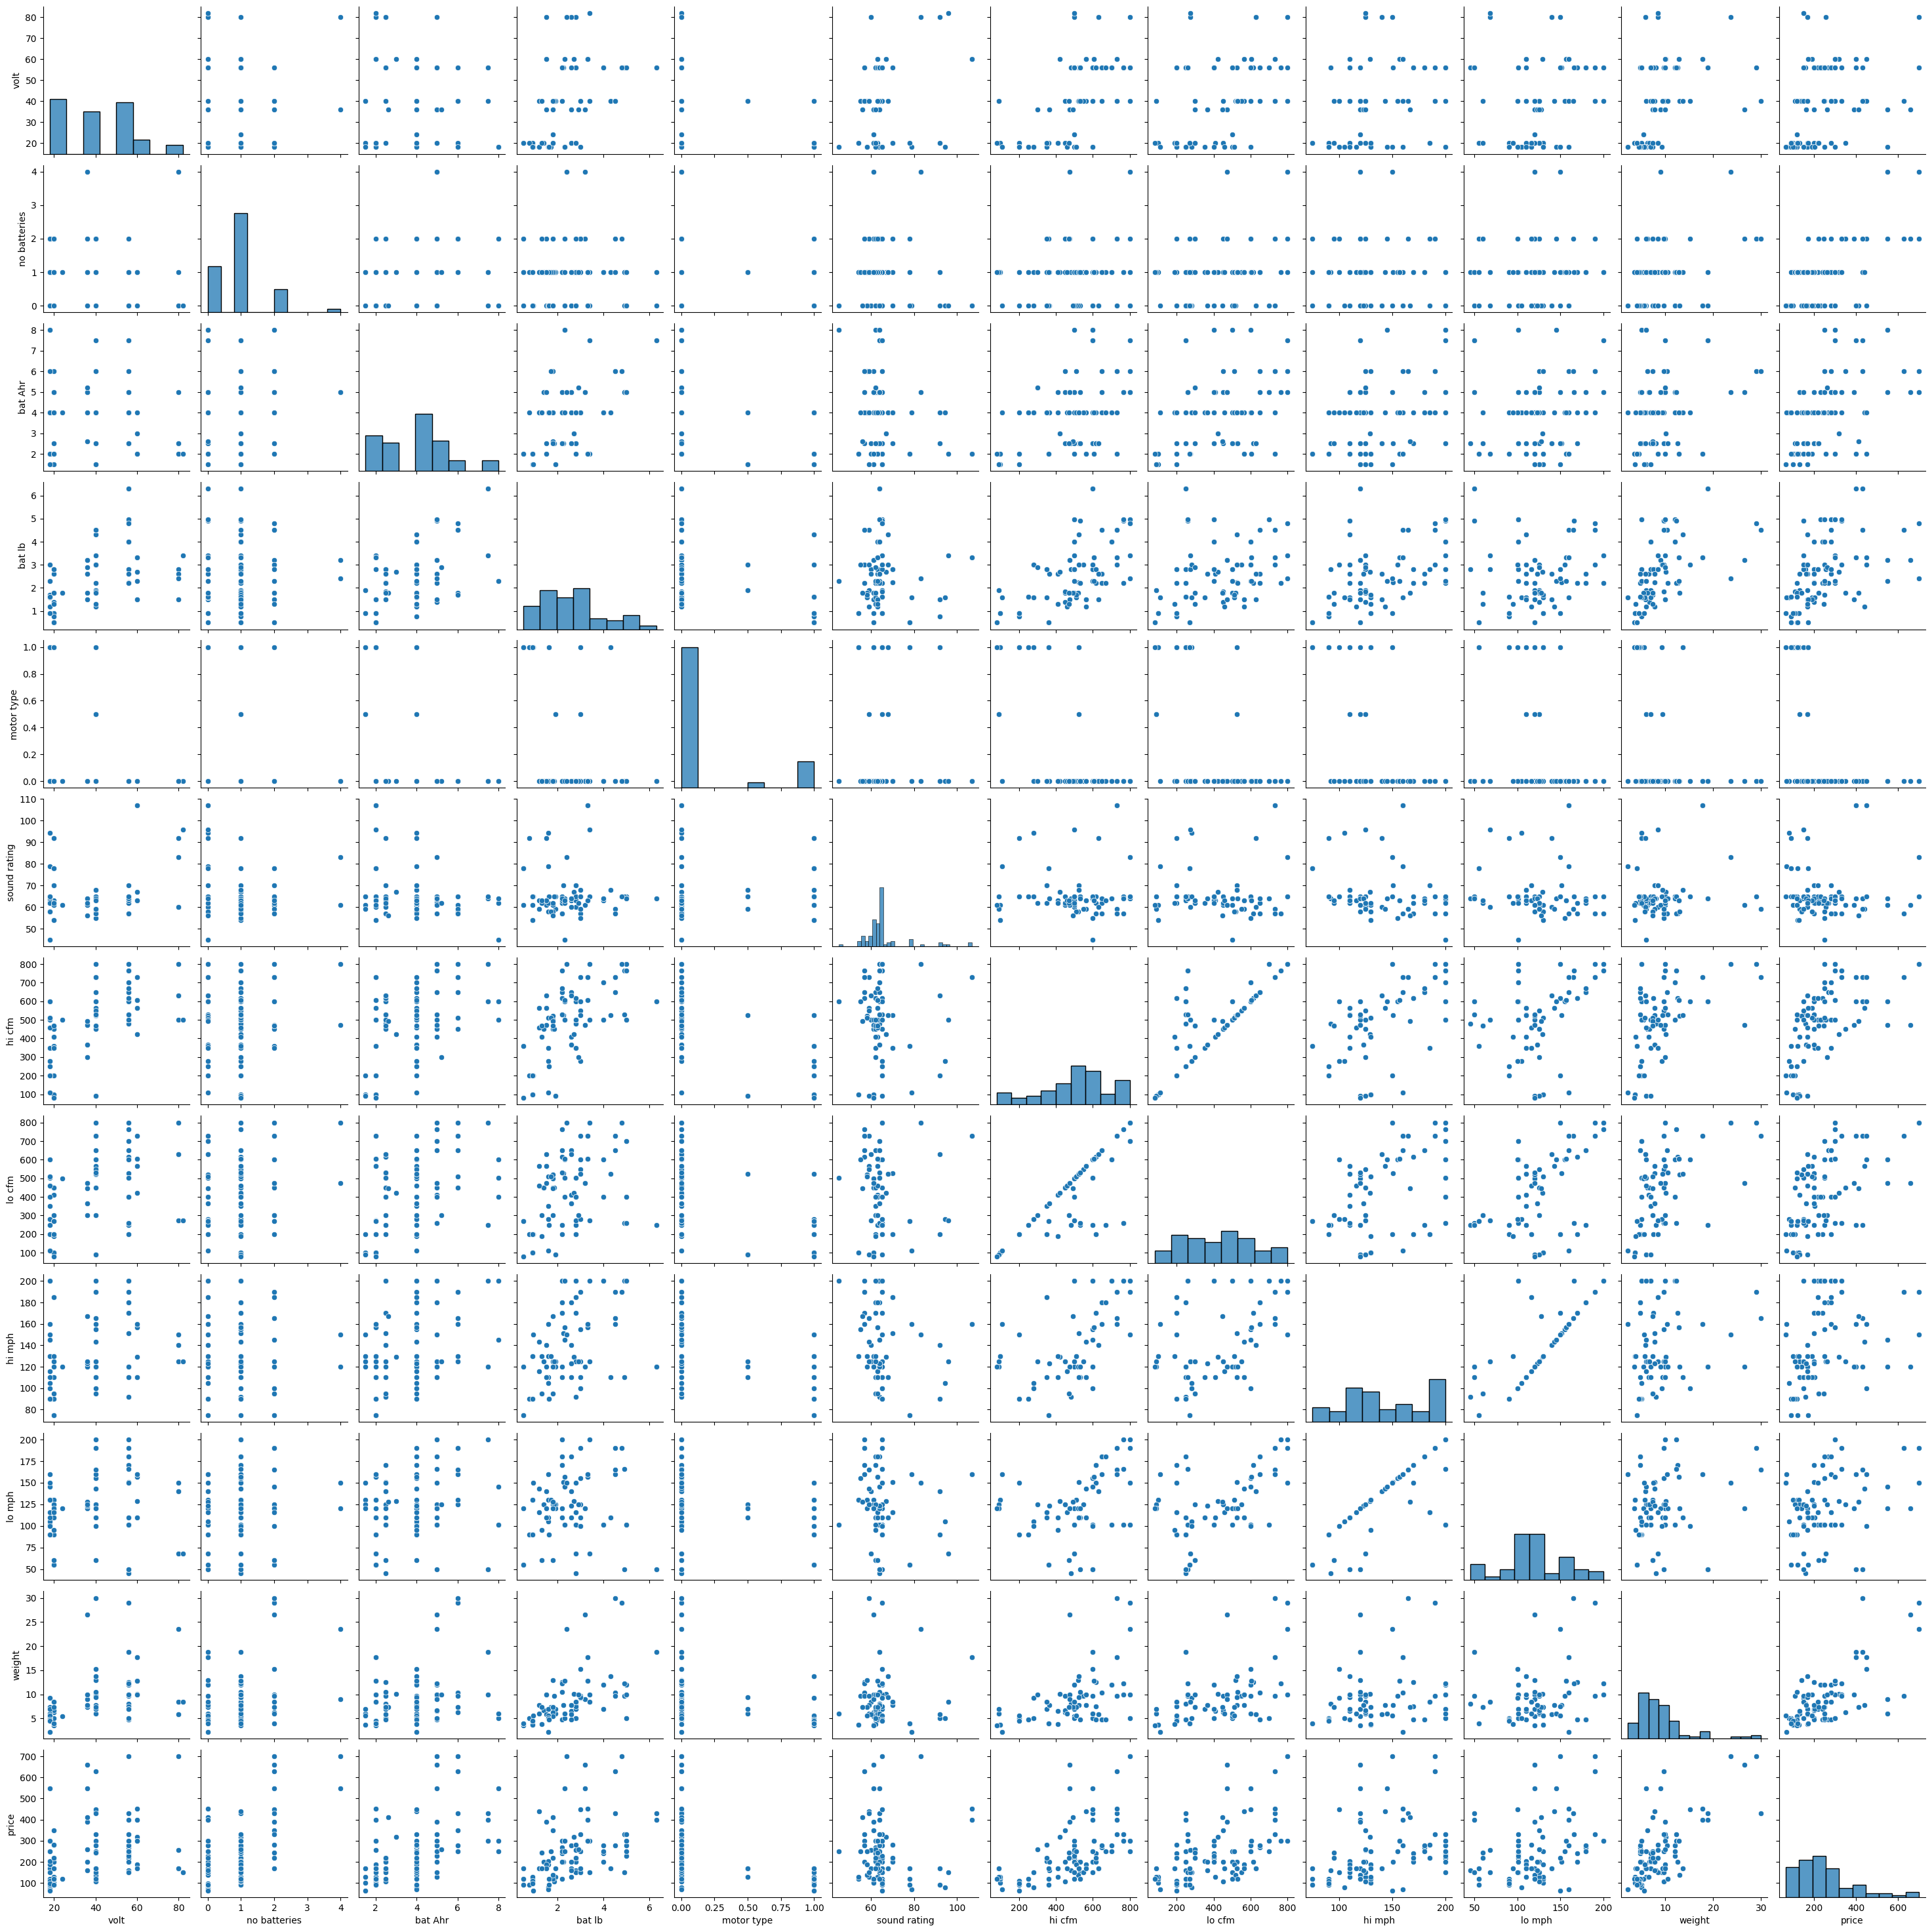

In [92]:
df_plot = df.iloc[:, 3:15]
sns.pairplot(df_plot)

For my dataset, est max torque, no batteries, hi max rpm all highly correlate. Recall, that highly correlated features because they move together, capture the same variance in the dataset.  There are techniques that are optimized to capture the most variance with the fewest features.  We will see these later in the semester.

For now, let's use another machine learning model to determine the relative importance of each of our features in our model.

Let's use Random forest to validate most important features

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
#from sklearn import set_config

In [94]:
# independant variables

X=df[['volt','no batteries','bat Ahr', 'bat lb', 'motor type', 'sound rating','hi cfm', 'lo cfm', 'hi mph', 'lo mph','weight']]


X=scale(X)


# the dependent variable
y = df[['price']]
y = scale (y)

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [95]:
X

array([[-1.18412498,  0.09456006, -1.47602582, ..., -0.38168993,
         0.26858728, -1.0106796 ],
       [-1.18412498,  0.09456006, -1.16314447, ..., -0.38168993,
         0.26858728, -1.0106796 ],
       [-1.18412498,  0.09456006, -1.16314447, ..., -0.38168993,
         0.26858728, -1.0106796 ],
       ...,
       [-1.18412498, -1.21577226,  0.08838092, ...,  1.06250565,
        -0.12318665, -0.10417184],
       [-1.18412498,  1.40489239, -0.85026313, ..., -1.30072348,
        -1.69028237, -0.31633323],
       [-0.08603585,  1.40489239,  0.08838092, ..., -1.30072348,
        -1.69028237, -0.31633323]])

We are now passing our dataset to a Random Forest Regressor -- an alternative to Linear Regression.  We will study Random Forests in a few weeks -- here we will use a characteristic of Random Forests, their ability to rate feature importance.

We just change our model from a LinearRegressor to a RandomForestRegressor!

In [96]:
rfr = RandomForestRegressor()
print(rfr)

RandomForestRegressor()


In [97]:
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score)



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R-squared: 0.931576912486271


In [98]:
ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  0.24180501163599571
RMSE:  0.4917367300049852


In [99]:
rfr.feature_importances_

array([0.01608549, 0.25307992, 0.10203206, 0.08200873, 0.00359735,
       0.02755539, 0.18234558, 0.06496624, 0.07955156, 0.02470539,
       0.16407228])

X features in order are [['volt','no batteries','bat Ahr', 'bat lb', 'motor type', 'sound rating', 'hi cfm', 'lo cfm, 'hi mph', 'lo mph', 'weight']]

Most important for the data that I used for this model are: hi cfm, no batteries (both very important), then weight, hi mph (medium importance) then motor type and voltage (low importance).  

Lab 4 is now complete.  Make sure all cells are visible and have been run (rerun if necessary).

The code below converts the ipynb file to PDF, and saves it to where this .ipynb file is.

In [105]:
NOTEBOOK_PATH = '/content/drive/MyDrive/ECEN250_F25_Lab4.ipynb' # Enter here, the path to your notebook file, e.g. "/content/drive/MyDrive/ECEN250/ECEN250_Lab4.ipynb". Do not change the lines below, and make sure you do not have multiple notebooks with the same path.
! pip install playwright
! jupyter nbconvert --to webpdf --allow-chromium-download "$NOTEBOOK_PATH"

[NbConvertApp] Converting notebook /content/drive/MyDrive/ECEN250_F25_Lab4.ipynb to webpdf
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Building PDF
173.7 MiB [] 0% 11.5s173.7 MiB [] 0% 37.4s173.7 MiB [] 0% 43.9s173.7 MiB [] 0% 29.4s173.7 MiB [] 0% 22.9s173.7 MiB [] 0% 16.1s173.7 MiB [] 0% 12.2s173.7 MiB [] 1% 9.4s173.7 MiB [] 1% 8.1s173.7 MiB [] 2% 7.1s173.7 MiB [] 2% 6.5s173.7 MiB [] 3% 5.5s173.7 MiB [] 4% 5.0s173.7 MiB [] 4% 4.8s173.7 MiB [] 4% 4.9s173.7 MiB [] 5% 4.6s173.7 MiB [] 6% 4.4s173.7 MiB [] 6% 4.3s173.7 MiB [] 7% 4.0s173.7 MiB [] 7% 3.8s173.7 MiB [] 8% 3.7s173.7 MiB [] 9% 3.7s173.7 MiB [] 10% 3.4s173.7 MiB [] 11% 3.3s173.7 MiB [] 11% 3.2s173.7 MiB [] 12% 3.1s173.7 MiB [] 13% 2.9s173.7 MiB [] 14% 2.8s173.7 MiB [] 15% 2.7s173.7 MiB [] 16% 2.6s173.7 MiB [] 17% 2.6s173.7 MiB [] 17% 2.5s173.7 MiB [] 18% 2.5s173.7 MiB [] 19% 2.4s173.7 MiB [] 20% 2.4s173.7 MiB [] 20% 2.5s173.7 MiB [] 21% 2.4s173.7 MiB [] 22% 2.3s173.7 MiB [] 23% 2.2s173.7 MiB

Download your notebook as an .ipynb file, then upload it along with the PDF file (saved in the same Google Drive folder as this notebook) to Canvas for Lab 4. Make sure that the PDF file matches your .ipynb file.